# **K-Nearest Neighbor (KNN)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HR_DataSet.xlsx to HR_DataSet.xlsx


In [3]:
df=pd.read_excel('HR_DataSet.xlsx')

In [4]:
df.describe()

,Late show up percentage,Project initiative percentage,Percentage of project delivery on time,Percentage of emails exchanged,Percentage of responsiveness,Percentage of professional email response,Percentage of sharing ideas,Percentage of helping colleagues,Percentage of entrepreneurial posts on LinkedIn,Percentage of Facebook comments,Quitting
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.501025,0.483284,0.427376,0.400711,0.537204,0.484969,0.471185,0.519861,0.521589,0.576462,0.50000
std,0.187179,0.184640,0.187881,0.144444,0.182367,0.182355,0.179900,0.194477,0.193181,0.162826,0.50025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.367040,0.359586,0.286459,0.295613,0.416221,0.355052,0.344950,0.381461,0.374331,0.464761,0.00000
50%,0.495075,0.486289,0.413932,0.397399,0.539818,0.483522,0.458429,0.515514,0.526394,0.586543,0.50000
75%,0.639074,0.622330,0.552530,0.496453,0.661523,0.612790,0.592071,0.661990,0.669513,0.689762,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
df.columns

Index(['Late show up percentage', 'Project initiative percentage',
       'Percentage of project delivery on time',
       'Percentage of emails exchanged', 'Percentage of responsiveness',
       'Percentage of professional email response',
       'Percentage of sharing ideas', 'Percentage of helping colleagues',
       'Percentage of entrepreneurial posts on LinkedIn',
       'Percentage of Facebook comments', 'Quitting'],
      dtype='object')

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Quitting',axis=1))
x_standardized_features = scaler.transform(df.drop('Quitting',axis=1))
x_standardized_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [7]:
x_standardized_features = pd.DataFrame(x_standardized_features,columns=df.columns[:-1])
x_standardized_features.head()

,Late show up percentage,Project initiative percentage,Percentage of project delivery on time,Percentage of emails exchanged,Percentage of responsiveness,Percentage of professional email response,Percentage of sharing ideas,Percentage of helping colleagues,Percentage of entrepreneurial posts on LinkedIn,Percentage of Facebook comments
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [8]:
y=df['Quitting']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: Quitting, Length: 1000, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

## **Cross validation**

In [10]:
seed= 1000
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(x_standardized_features,y, test_size=0.30)

In [11]:
len(X_train)

700

## **Applying KNN model**

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
np.random.seed(seed)
KNN = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

In [14]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [15]:
pred = KNN.predict(X_test)

## **Prediction and evaluation**

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,pred))

[[137  14]
 [ 11 138]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       151
           1       0.91      0.93      0.92       149

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## **Choosing K**

In [19]:
error_rate = []

for i in range(1,50):
    
    KNN = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

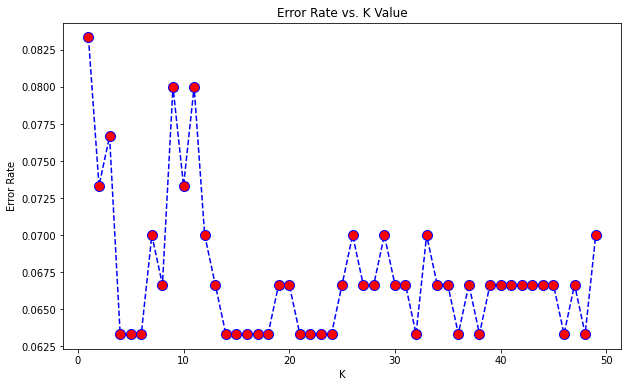

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
KNN = KNeighborsClassifier(n_neighbors=1,metric='euclidean')

KNN.fit(X_train,y_train)
pred = KNN.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[137  14]
 [ 11 138]]


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       151
           1       0.91      0.93      0.92       149

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [22]:
from sklearn.metrics import classification_report,confusion_matrix
np.random.seed(seed)
KNN = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))



[[142   9]
 [ 10 139]]


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       151
           1       0.94      0.93      0.94       149

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [23]:
from sklearn import metrics

In [24]:
Scores = []

for k in range(1, 51):
    KNN = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    Scores.append(metrics.accuracy_score(y_test, y_pred))
Scores

[0.9166666666666666,
 0.9266666666666666,
 0.9233333333333333,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.93,
 0.9333333333333333,
 0.92,
 0.9266666666666666,
 0.92,
 0.93,
 0.9333333333333333,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.9333333333333333,
 0.9333333333333333,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.9366666666666666,
 0.9333333333333333,
 0.93,
 0.9333333333333333,
 0.9333333333333333,
 0.93,
 0.9333333333333333,
 0.9333333333333333,
 0.9366666666666666,
 0.93,
 0.9333333333333333,
 0.9333333333333333,
 0.9366666666666666,
 0.9333333333333333,
 0.9366666666666666,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9366666666666666,
 0.9333333333333333,
 0.9366666666666666,
 0.93,
 0.9333333333333333]

Text(0.5, 1.0, 'K Determination Using KNN')

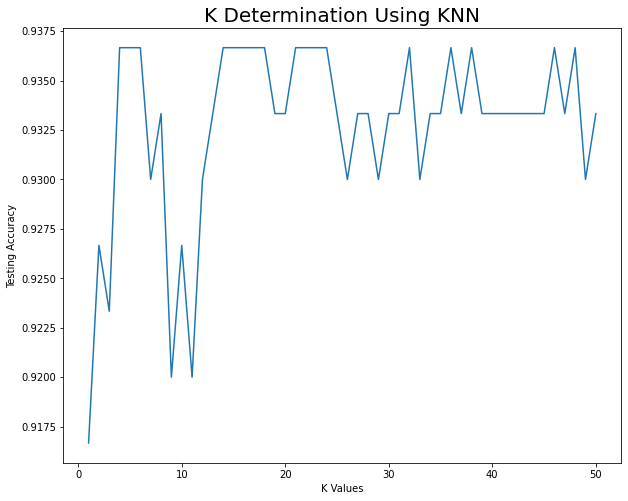

In [25]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 51), Scores)
plt.xlabel('K Values')
plt.ylabel('Testing Accuracy')
plt.title('K Determination Using KNN', fontsize=20)